# Kinetic Visualization tutorial
## Cathy Wang

### Goal:
1. Example script to show how the function can be used
2. Breakdown of specific callable visualization/analyses

In [1]:
%cd ..

W:\Cathy\2026 MIT\Bhatia\ActivityAtlas\protease_activity_analysis


In [2]:
import protease_activity_analysis as paa

In [3]:
# for the purpose of demonstrating individual functions within package
import pandas as pd

Using sample files to plot and calculate fold change values longitudinally

In [ ]:
!python analyze_kinetic.py --data_path=data/stm_kinetic/MMP12_stm.xlsx --fc_time=21 --linear_time=21

In [ ]:
!python analyze_kinetic.py --data_path=data/stm_kinetic/MMP13_stm.xlsx --fc_time=21 --linear_time=21

Access files in outputs directory 

In [4]:
data_files = ['outputs\MMP12\MMP12_fc.csv', 'outputs\MMP13\MMP13_fc.csv']

### Analyses available in kinetic_visualization function:
- heatmap (@Carmen to finish)
- correlation matrices (Pearson, Spearman)
- scatterplot of z-scores
- histogram of z-score distribution
- top n cleaved substrates
- ranked list of substrates cleaved above z-score threshold
- pie chart of proportion of cleaved substrates in each label/class
- tissue specificity vs cleavage efficiency scatterplot

In [5]:
out_dir = 'outputs/testing'
screen_name = 'agg_testing'
agg_df = paa.vis.aggregate_data(data_files, out_dir)

In [7]:
fake_row_dict = pd.DataFrame(list(range(len(agg_df.index))), index=agg_df.index,columns=['Class'])
fake_row_dict[fake_row_dict.columns[0]]


PQ13     0
PQ2      1
PQ3      2
PQ4      3
PX11     4
PX2      5
PX3      6
PX4      7
Q1       8
Q3       9
Q5      10
Q6      11
Q7      12
Q9      13
SQ14    14
Name: Class, dtype: int64

Putting together individual visualizations/analyses to call single function

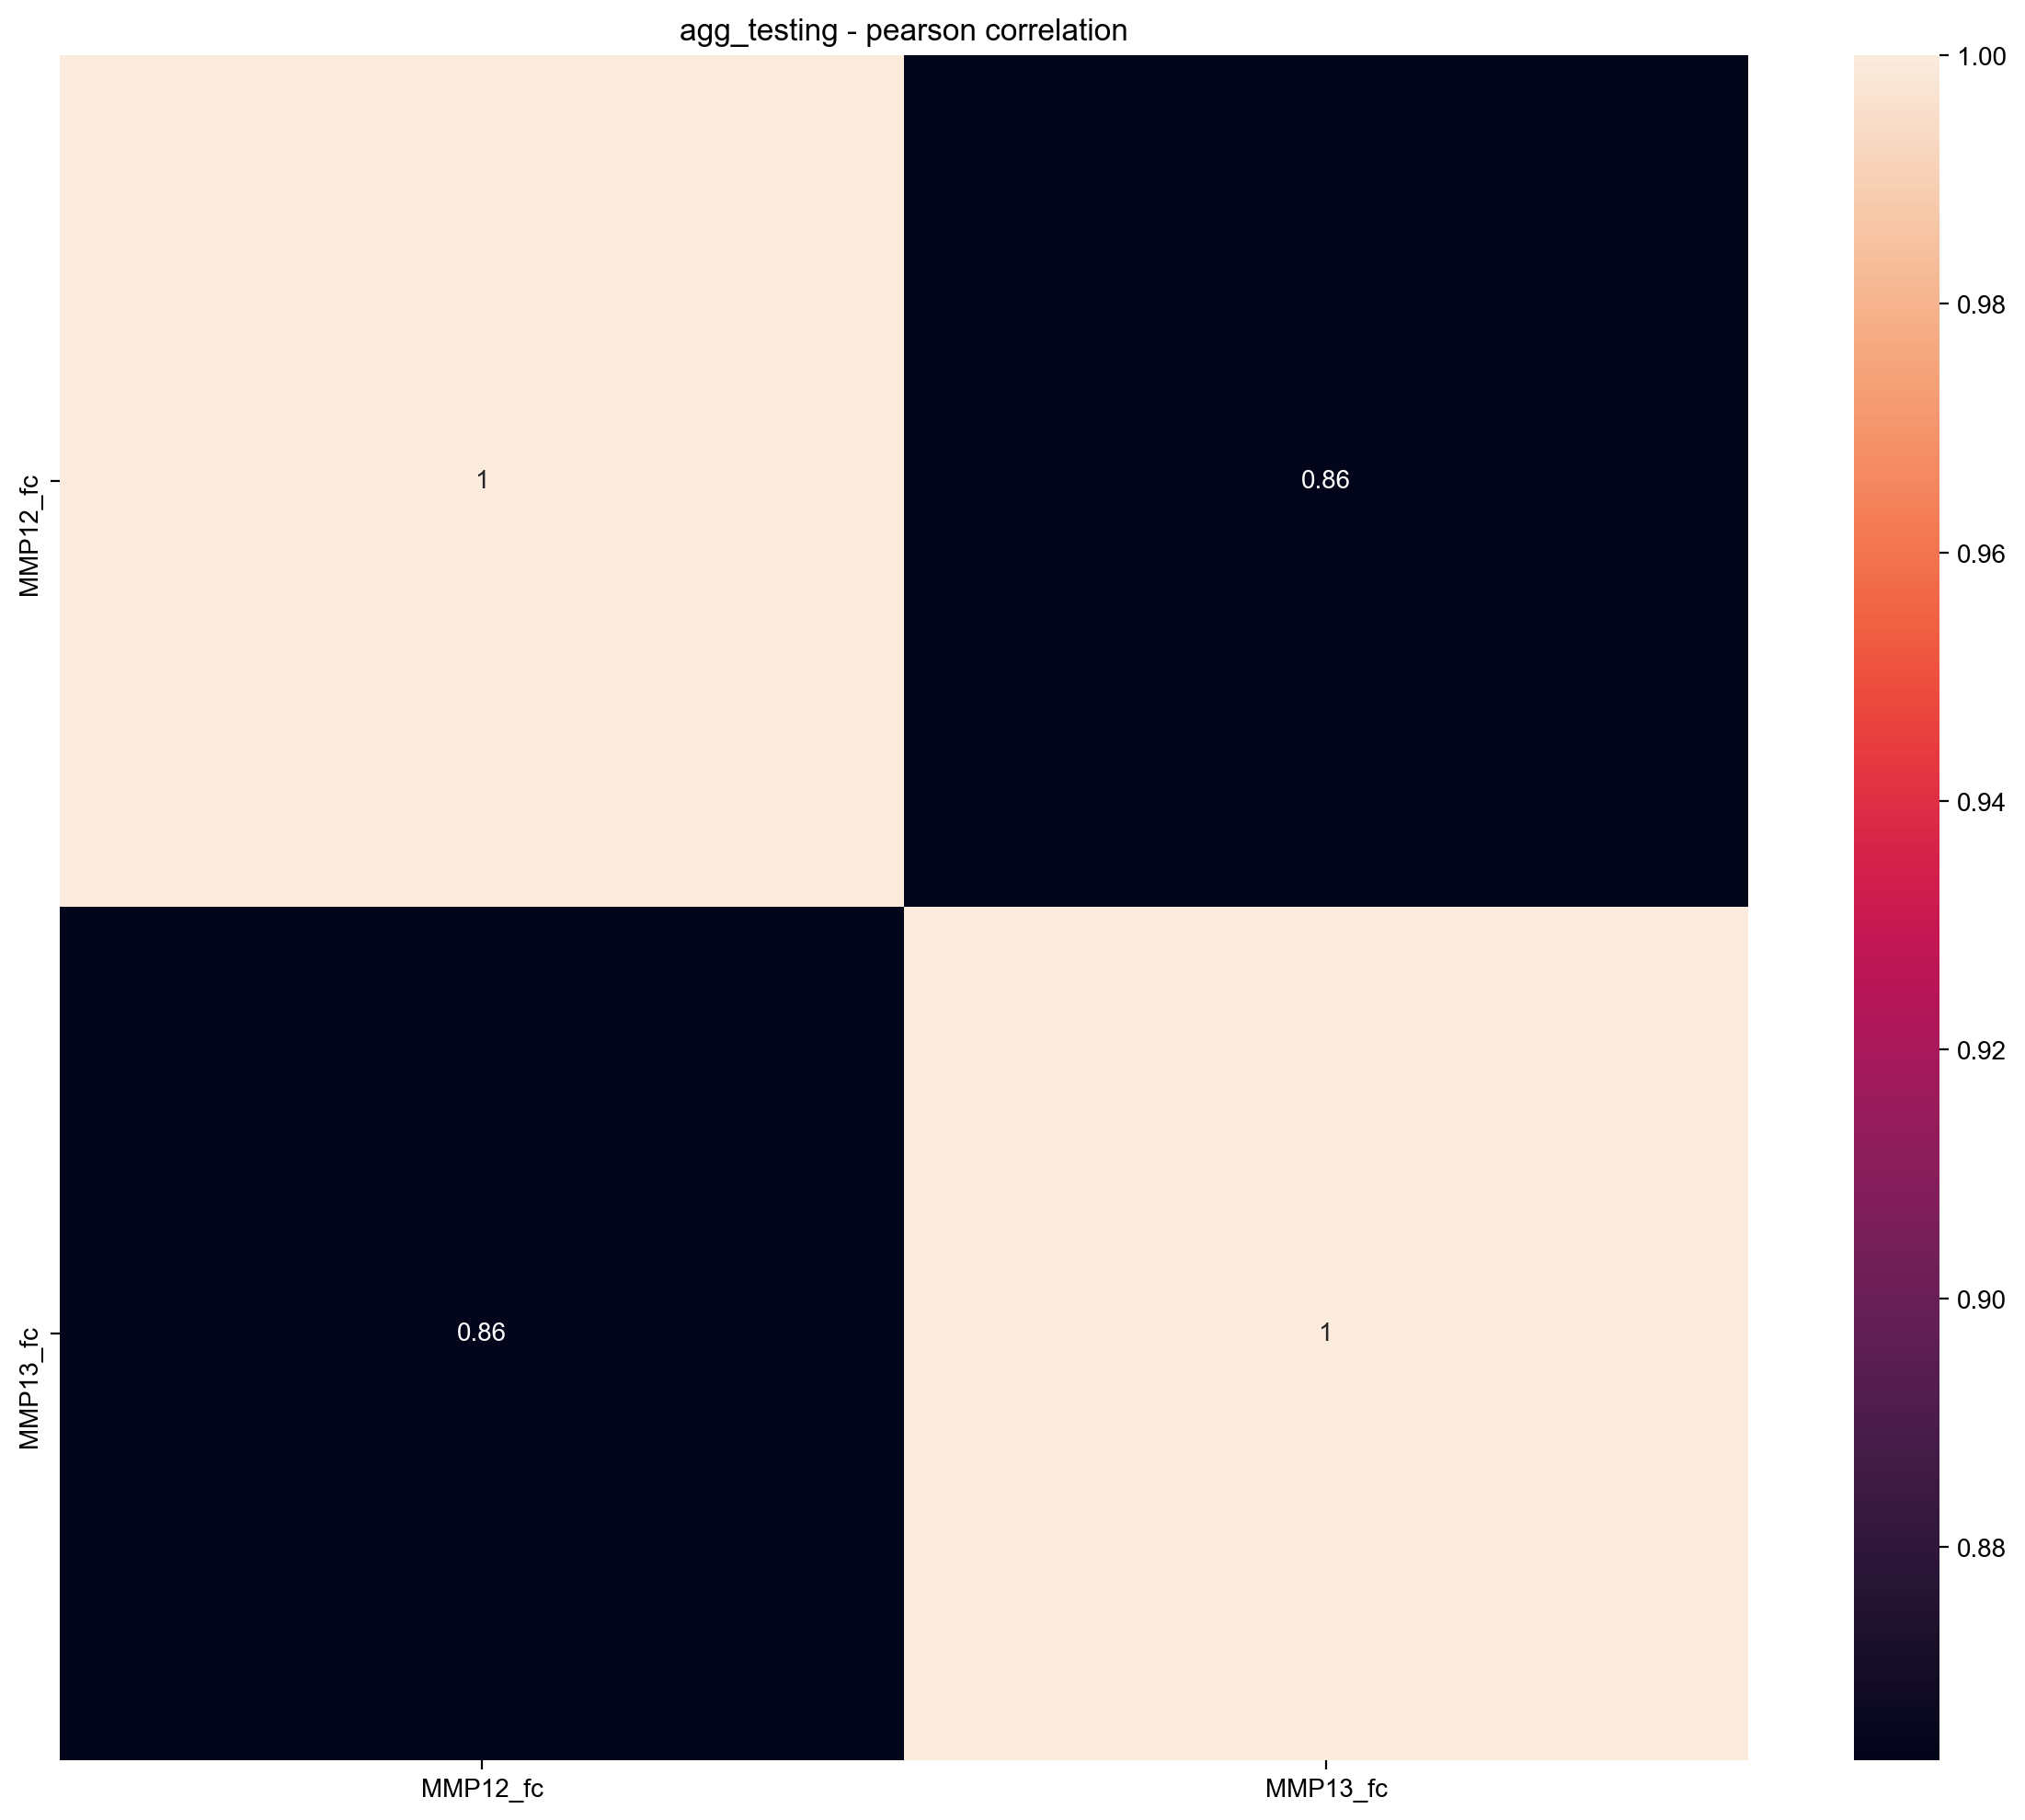

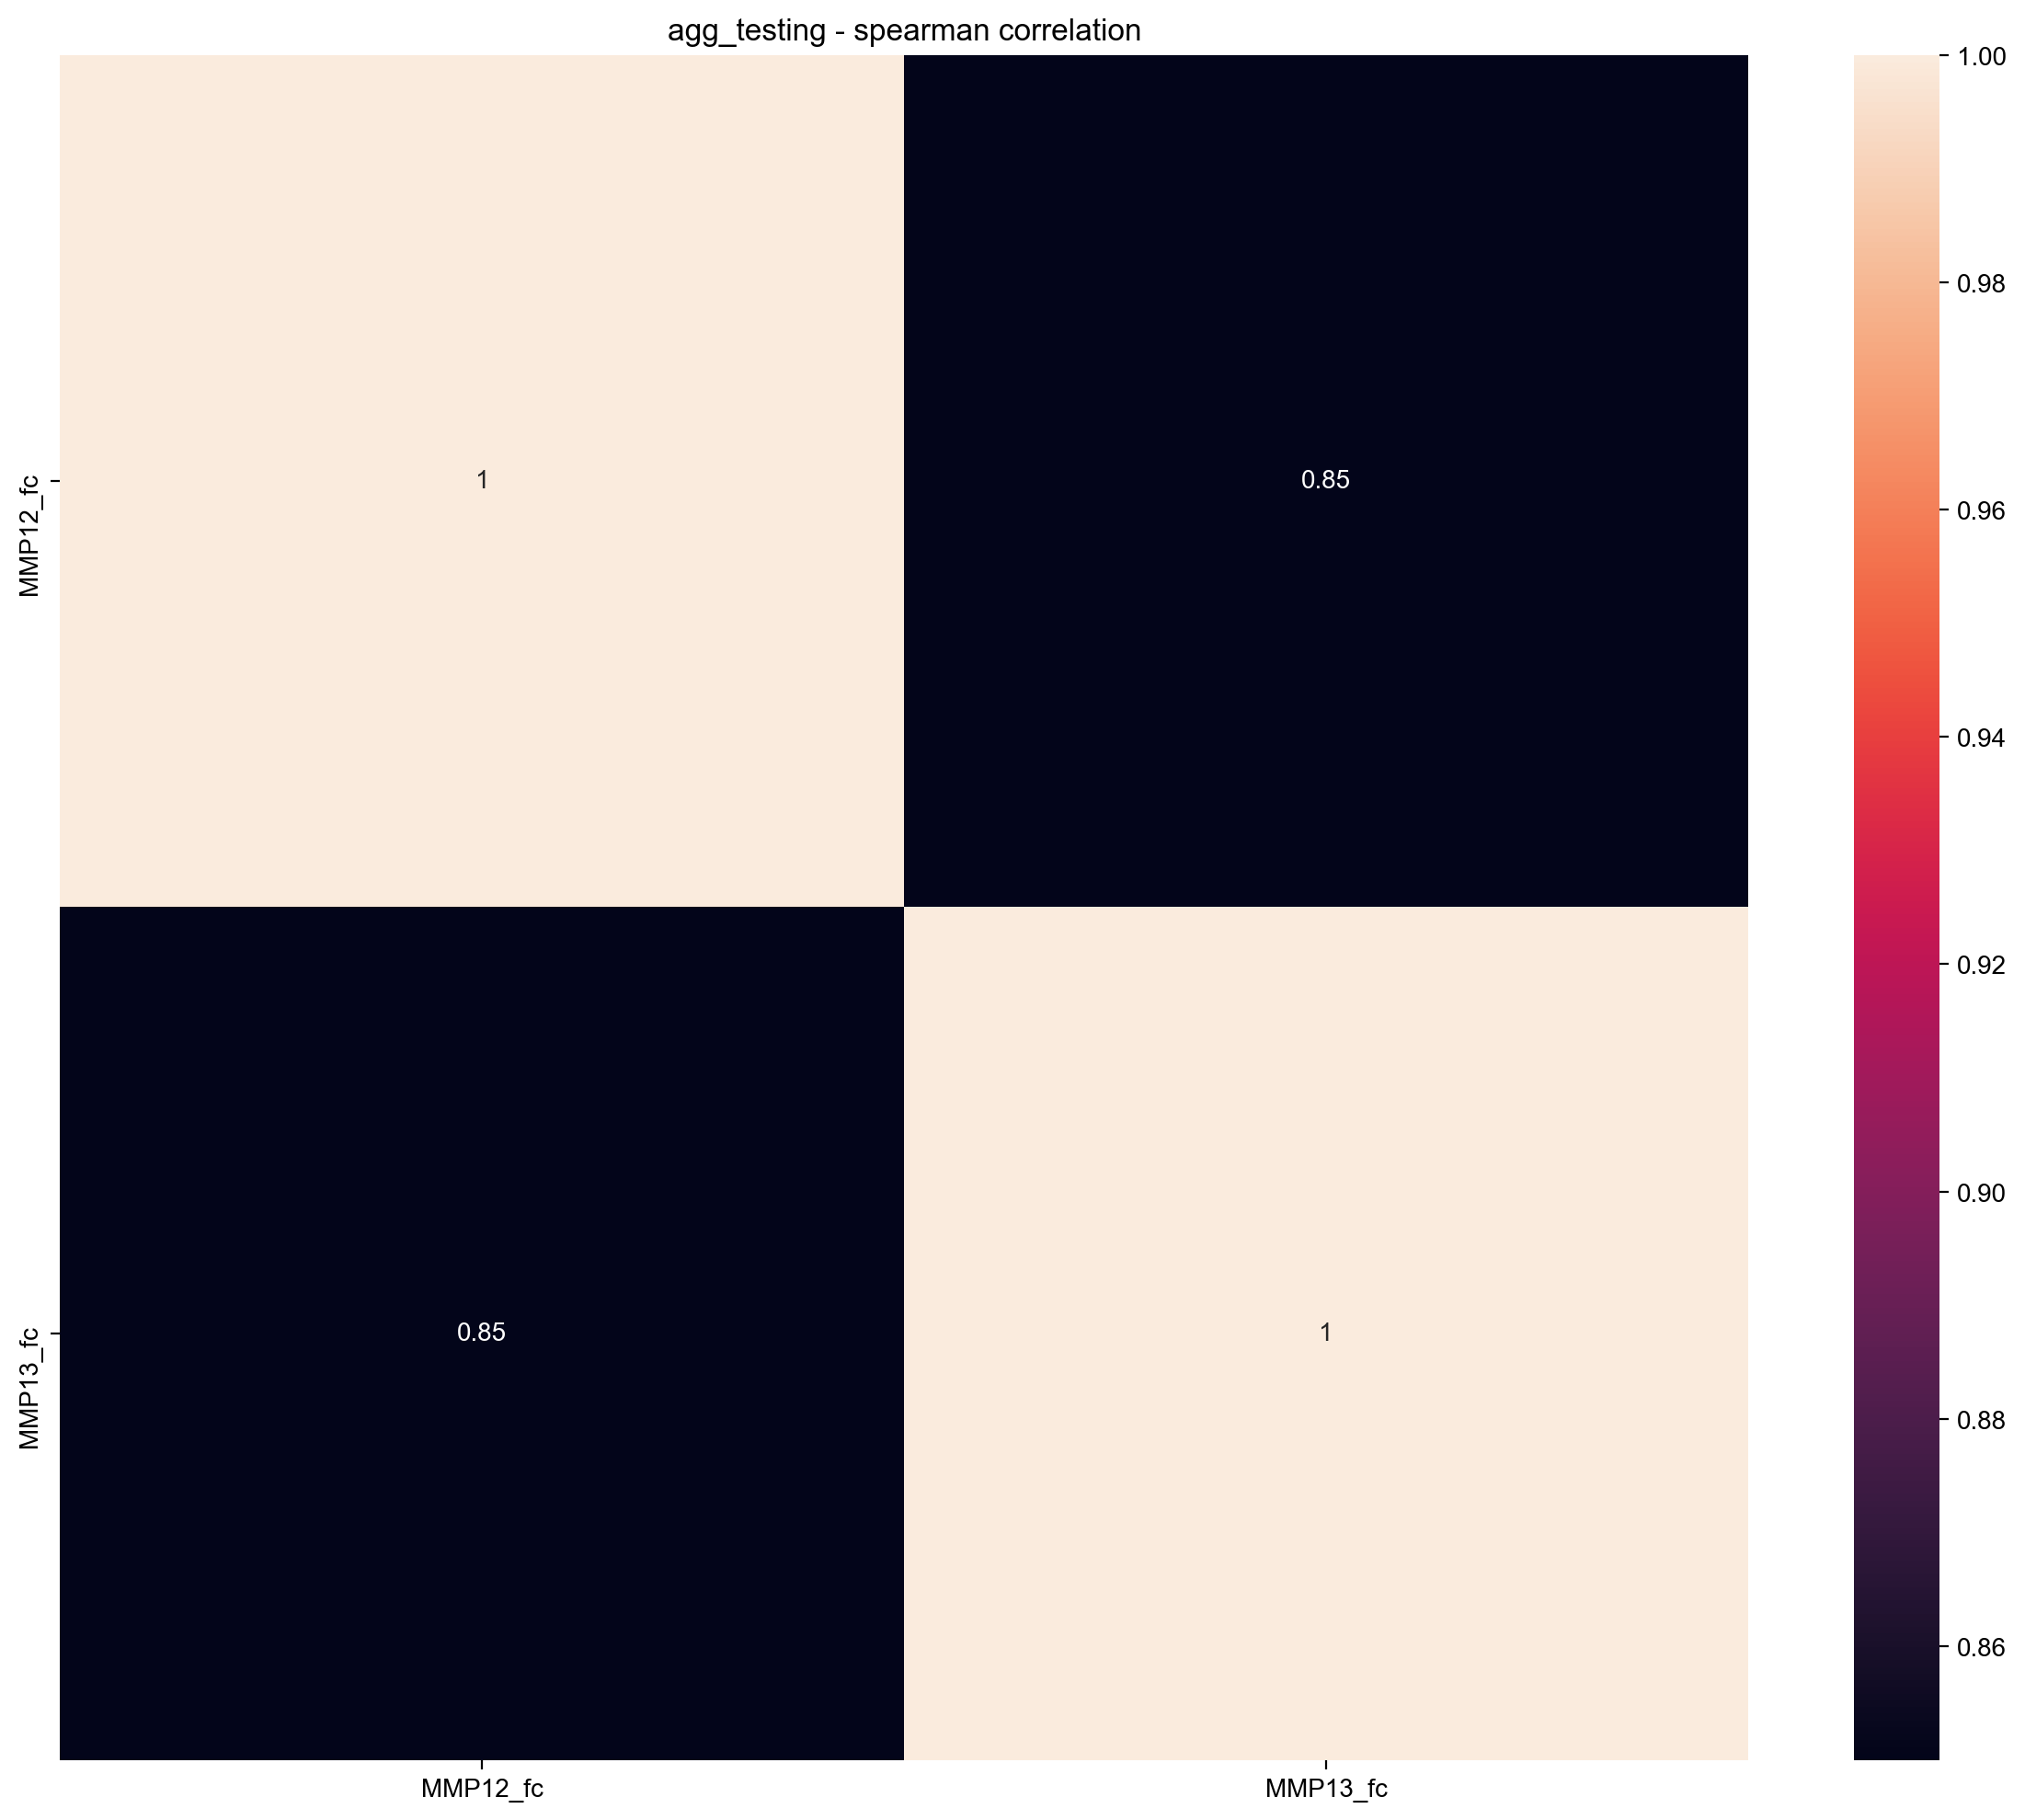

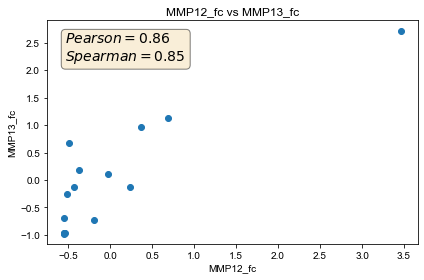

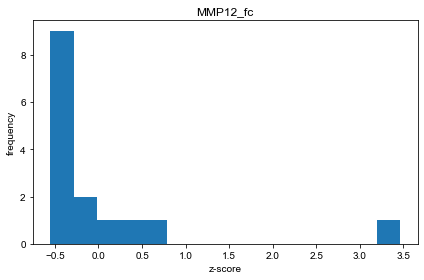

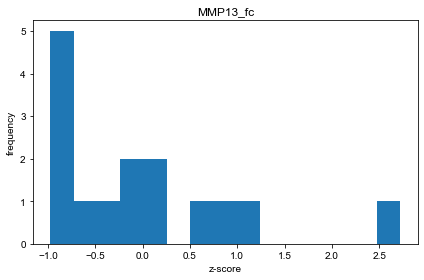

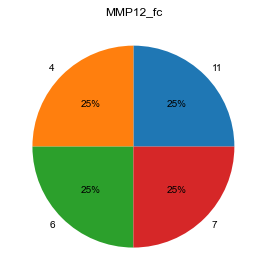

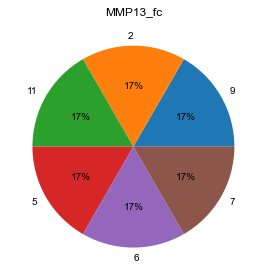

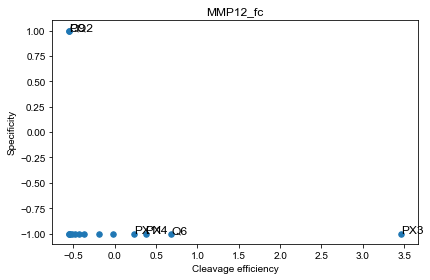

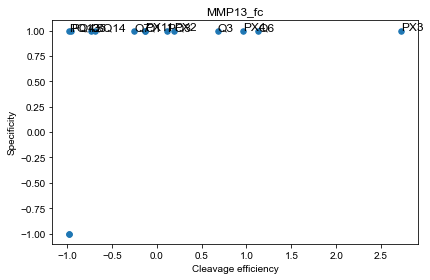

In [14]:
paa.kinetic.kinetic_visualization(data_files, screen_name, fake_row_dict, out_dir, threshold=0)

Demonstrate that functions within kinetic_visualization individually work

In [ ]:
scaled_data = paa.vis.scale_data(agg_df)

Creating fake classes/labels for substrates

In [6]:
ind_dict = pd.Series(agg_df.index, index=range(agg_df.shape[0])).to_dict()
ind_dict

{0: 'PQ13',
 1: 'PQ2',
 2: 'PQ3',
 3: 'PQ4',
 4: 'PX11',
 5: 'PX2',
 6: 'PX3',
 7: 'PX4',
 8: 'Q1',
 9: 'Q3',
 10: 'Q5',
 11: 'Q6',
 12: 'Q7',
 13: 'Q9',
 14: 'SQ14'}

Correlation matrices

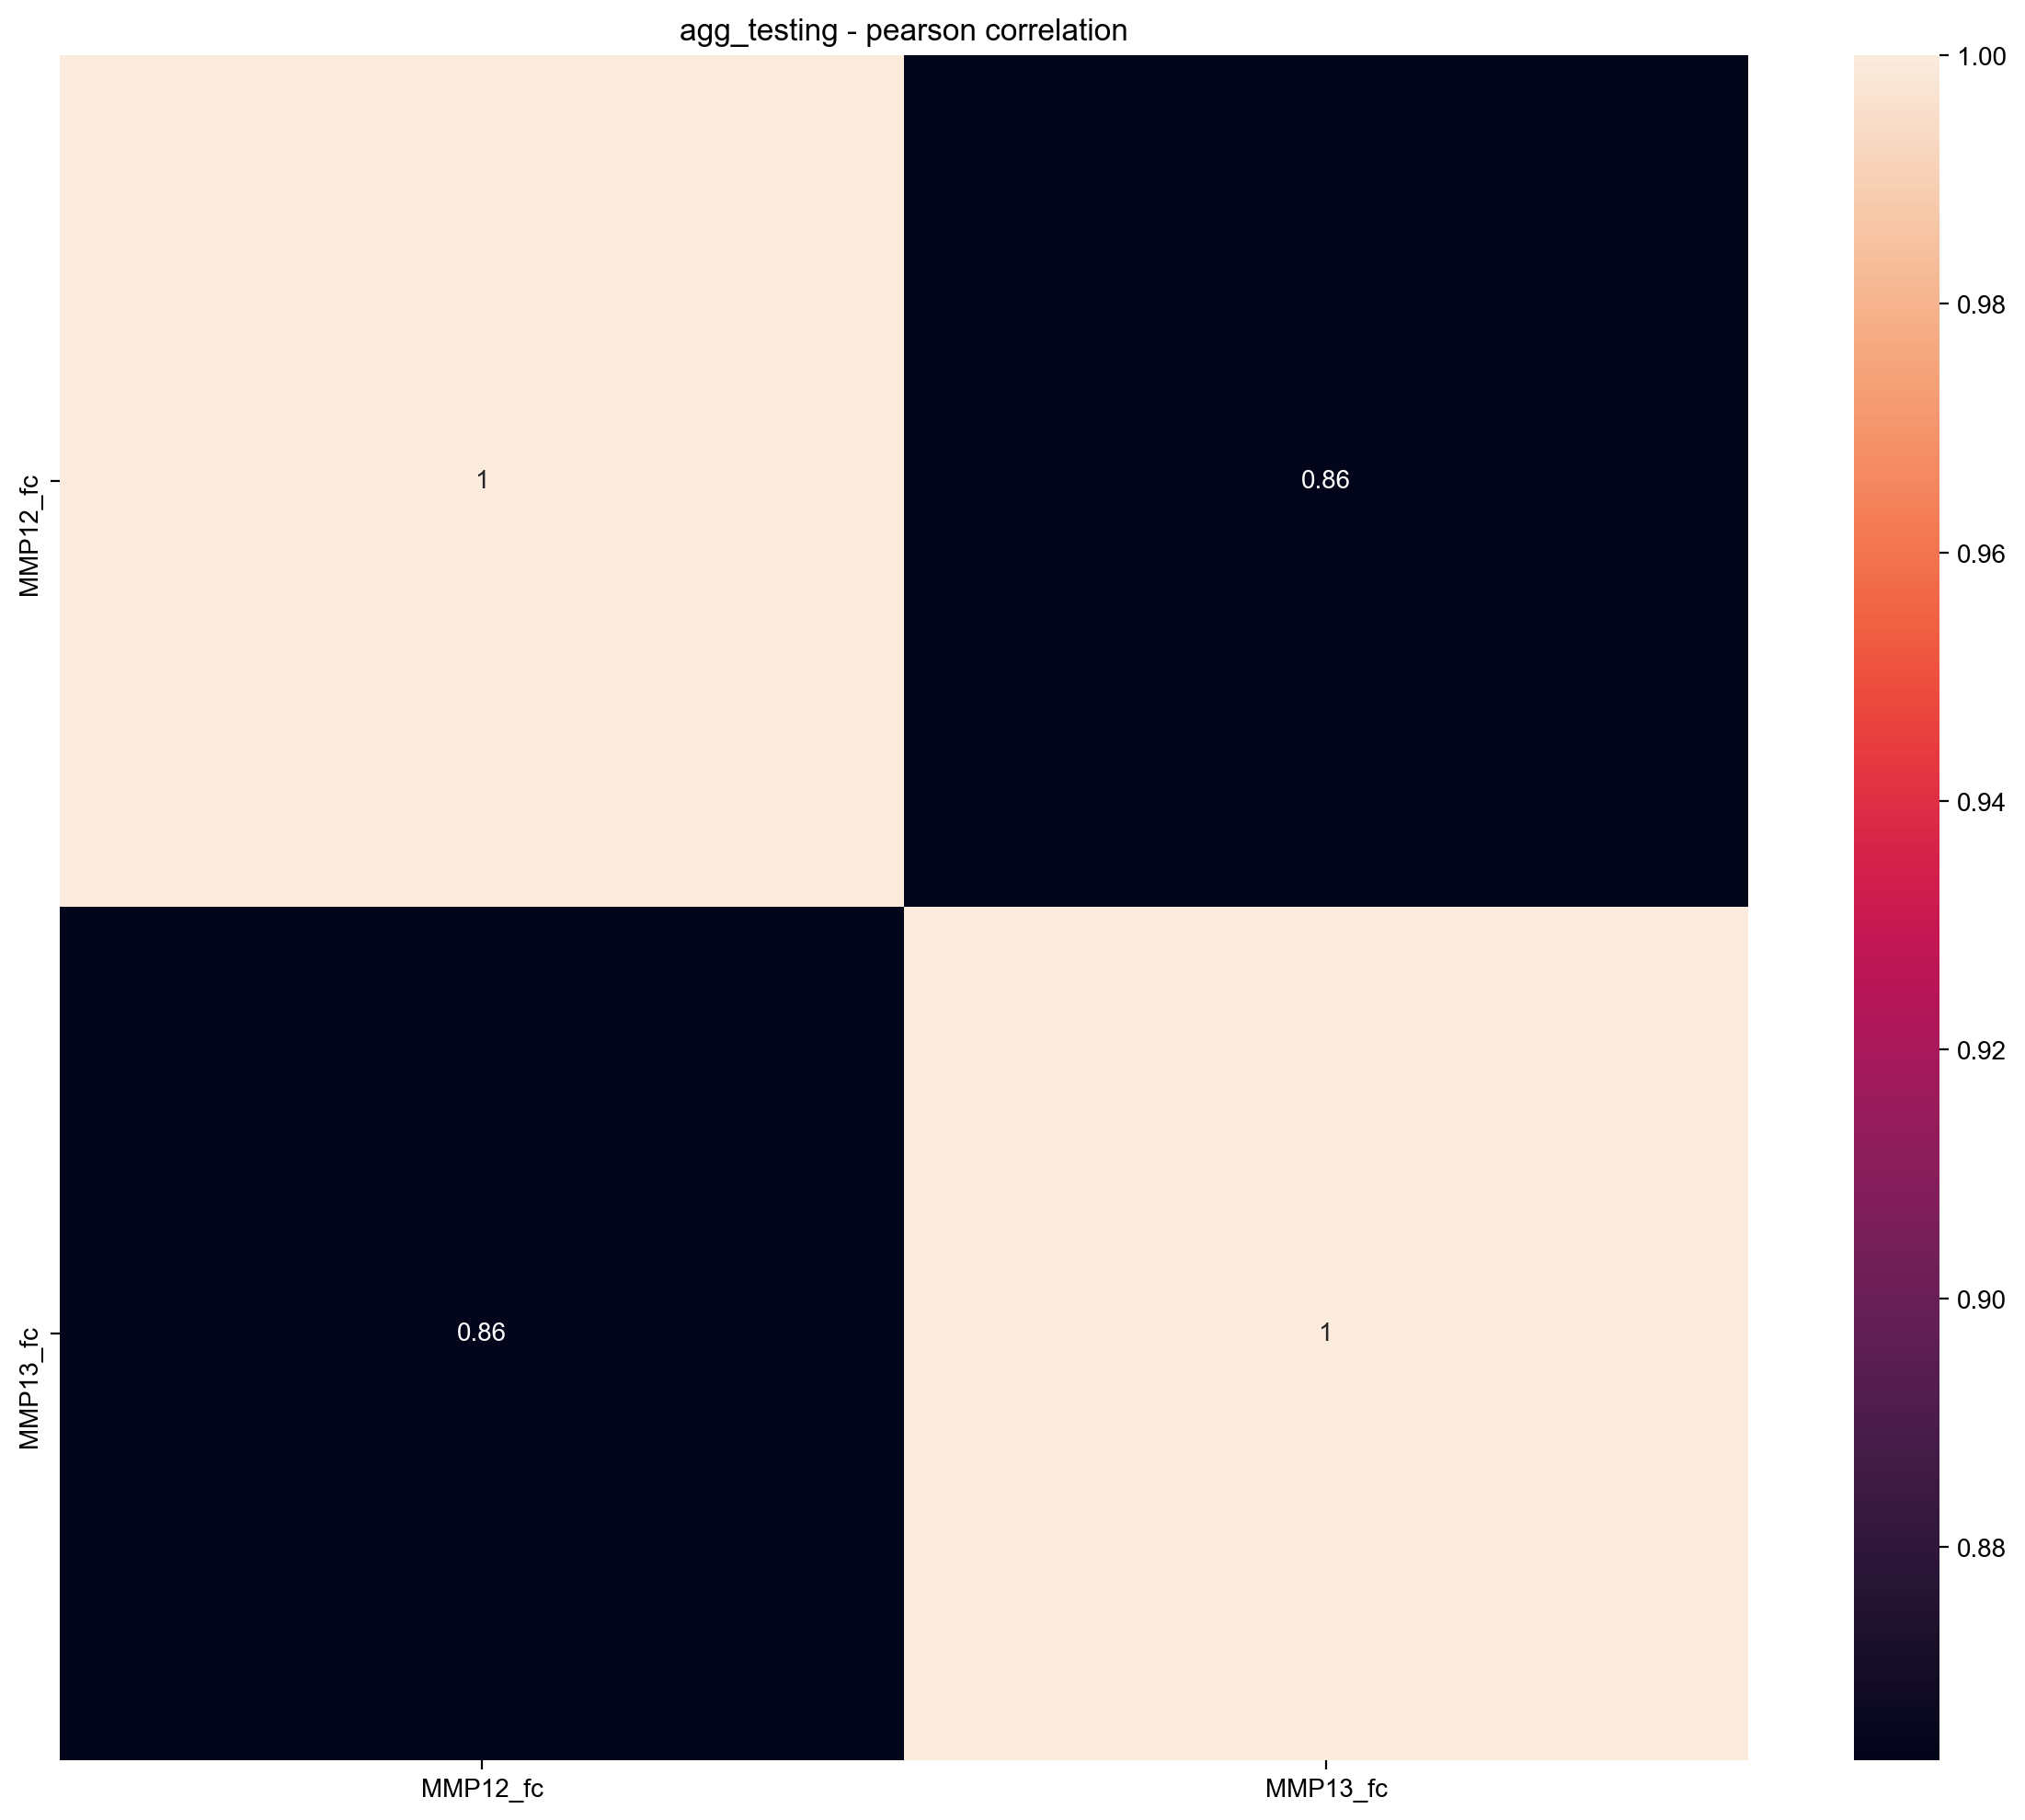

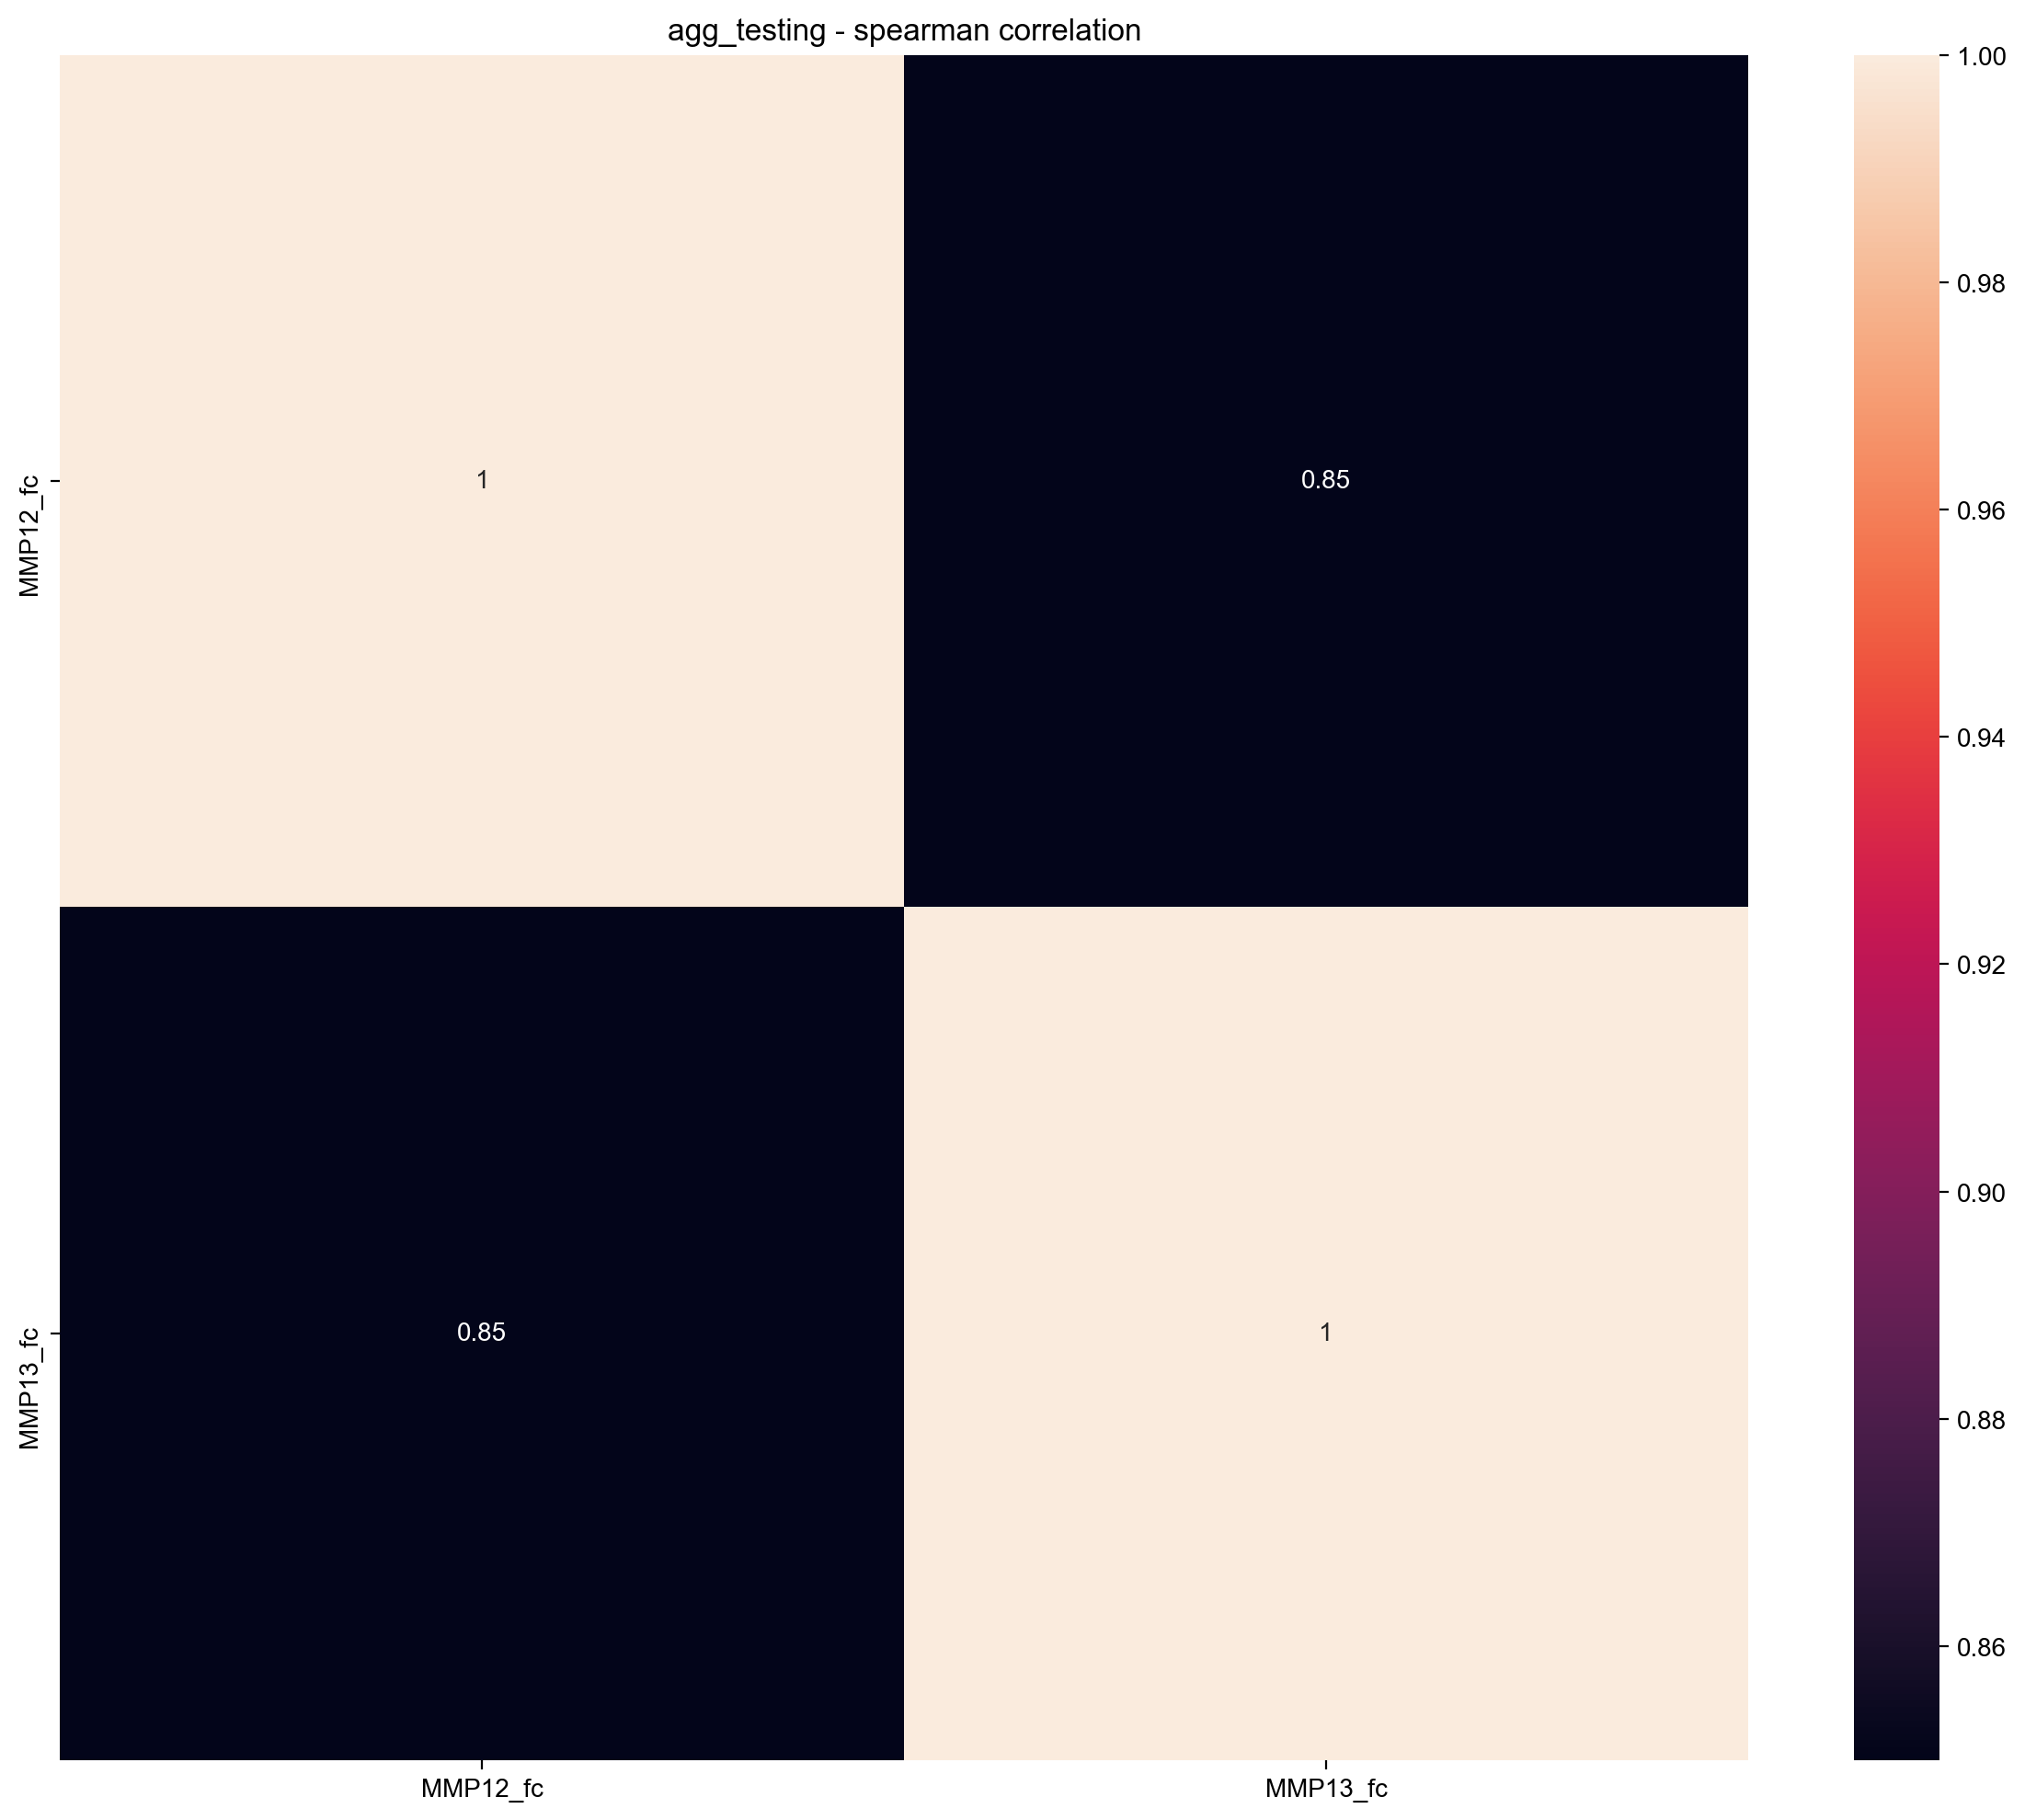

In [8]:
corr_matrix_pearson = paa.vis.plot_correlation_matrix(scaled_data, screen_name, out_dir, method='pearson');
corr_matrix_spear = paa.vis.plot_correlation_matrix(scaled_data, screen_name, out_dir, method='spearman');

Pairwise scatterplot of z-scores

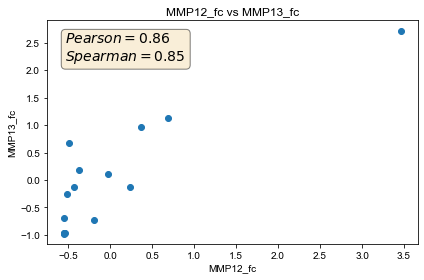

In [9]:
paa.vis.plot_zscore_scatter(scaled_data, out_dir, corr_matrix_pearson, corr_matrix_spear)

Distribution of z-scores

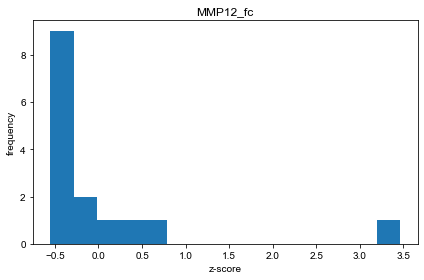

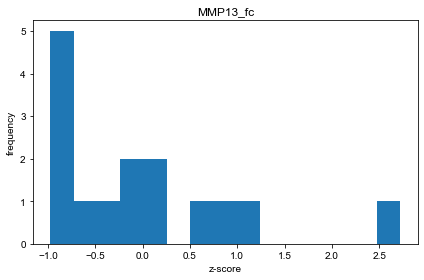

In [10]:
paa.vis.plot_zscore_hist(scaled_data,out_dir)

Top cleaved substrates

In [11]:
paa.vis.top_n_hits(agg_df, ind_dict, out_dir)

,MMP12_fc,MMP13_fc
0,PX3,PX3
1,Q6,Q6
2,PX4,PX4
3,PX11,Q3
4,PQ3,PX2


Proportion of cleaved substrates of different classes/labels

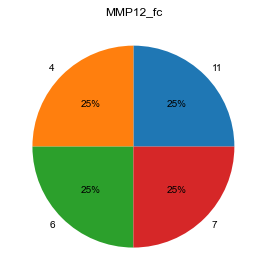

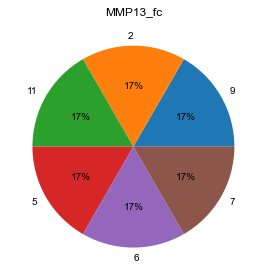

In [12]:
thresh_df = paa.vis.threshold_substrates(scaled_data, ind_dict, out_dir, threshold=0)
paa.vis.plot_substrate_class_pie(thresh_df, fake_row_dict, out_dir)

Tissue specificity vs cleavage efficiency plots

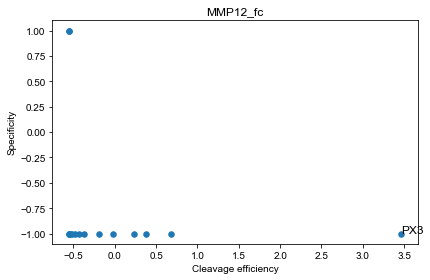

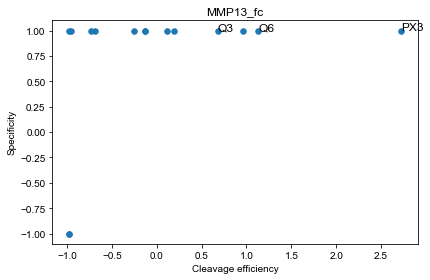

In [13]:
paa.vis.specificity_analysis(agg_df, out_dir)